<a href="https://colab.research.google.com/github/codebuzer/Bioactivity-Prediction-App/blob/main/rfAMRphenopred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import f1_score

In [22]:
df = pd.read_csv("final_feature.csv", low_memory =False )
df.shape

(14806, 303)

In [23]:
X = df.iloc[:,3:]
X.shape

(14806, 300)

In [24]:
y = pd.read_csv("final_labels.csv")
cols = y.columns
y.shape

(14806, 53)

In [25]:
y = np.array(y, dtype = 'int')
y

array([[1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((10364, 300), (10364, 53), (4442, 300), (4442, 53))

In [30]:
model = MultiOutputClassifier(RandomForestClassifier(max_depth= 30,
                                                     min_samples_split=5,
                                                     min_samples_leaf = 2,
                                                     max_features =0.2,
                                                     random_state=42,
                                                     n_jobs = -1))

In [31]:
clf = make_pipeline(StandardScaler(), model)
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('multioutputclassifier',
                 MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=30,
                                                                        max_features=0.2,
                                                                        min_samples_leaf=2,
                                                                        min_samples_split=5,
                                                                        n_jobs=-1,
                                                                        random_state=42)))])

In [32]:
y_hat = clf.predict(X_test)    

In [33]:
y_hat , y_test

(array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]), array([[1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]))

In [34]:
y_hat.shape, y_test.shape

((4442, 53), (4442, 53))

In [35]:
cols

Index(['Tetracycline', 'Amikacin', 'Amoxicillin',
       'Amoxicillin+Clavulanic acid', 'Ampicillin', 'Azithromycin',
       'Aztreonam', 'Cefepime', 'Cefixime', 'Cefotaxime',
       'Cefotaxime+Clavulanic acid', 'Cefoxitin', 'Ceftazidime', 'Ceftiofur',
       'Ceftriaxone', 'Cephalothin', 'Chloramphenicol', 'Ciprofloxacin',
       'Clindamycin', 'Colistin', 'Doxycycline', 'Ertapenem', 'Erythromycin',
       'Florfenicol', 'Fluoroquinolone', 'Fusidic acid', 'Gentamicin',
       'Imipenem', 'Kanamycin', 'Lincomycin', 'Linezolid', 'Meropenem',
       'Minocycline', 'Mupirocin', 'Nalidixic acid', 'Neomycin', 'Netilmicin',
       'Penicillin', 'Piperacillin', 'Piperacillin+Tazobactam', 'Rifampicin',
       'Spectinomycin', 'Sulfamethoxazole', 'Teicoplanin', 'Telithromycin',
       'Tetracycline.1', 'Tiamulin', 'Ticarcillin',
       'Ticarcillin+Clavulanic acid', 'Tigecycline', 'Tobramycin',
       'Trimethoprim', 'Vancomycin'],
      dtype='object')

In [40]:
# cols = pd.read_csv("labels.csv", low_memory = False).iloc[:500,:53].columns.tolist()
from sklearn import metrics
acc_dict = dict.fromkeys(cols)
cnf_dict = dict.fromkeys(cols)
pre_dict = dict.fromkeys(cols)
rec_dict = dict.fromkeys(cols)
f1_dict = dict.fromkeys(cols)
i = 0
for k in acc_dict.keys():
    acc_dict[k] = accuracy_score(y_test[:,i], y_hat[:,i])
    cnf_dict[k] = metrics.confusion_matrix(y_test[:,i], y_hat[:,i])
    pre_dict[k] = metrics.precision_score(y_test[:,i], y_hat[:,i], average = "weighted")
    rec_dict[k] = metrics.recall_score(y_test[:,i], y_hat[:,i], average = "weighted")
    f1_dict[k] = metrics.f1_score(y_test[:,i], y_hat[:,i], average = "weighted")
    i += 1

for k in cols[:10]:
    print(k)
    print(f"Accuracy: {acc_dict[k]}, Precision: {pre_dict[k]}, Recall: {rec_dict[k]}, f1-Score: {f1_dict[k]}")
    print(cnf_dict[k])


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Tetracycline
Accuracy: 0.8356596127870328, Precision: 0.8286644973259907, Recall: 0.8356596127870328, f1-Score: 0.8263023737610066
[[3075  204]
 [ 526  637]]
Amikacin
Accuracy: 0.9261593876632148, Precision: 0.9232894092558891, Recall: 0.9261593876632148, f1-Score: 0.9202979969459508
[[3713   59]
 [ 269  401]]
Amoxicillin
Accuracy: 0.9180549302116164, Precision: 0.8967841468405346, Recall: 0.9180549302116164, f1-Score: 0.8985653989447907
[[4009   55]
 [ 309   69]]
Amoxicillin+Clavulanic acid
Accuracy: 0.9234579018460153, Precision: 0.9035399961174198, Recall: 0.9234579018460153, f1-Score: 0.906467586668386
[[4034   58]
 [ 282   68]]
Ampicillin
Accuracy: 0.8930661864025213, Precision: 0.8926462776311063, Recall: 0.8930661864025213, f1-Score: 0.892666491351842
[[2533  206]
 [ 269 1434]]
Azithromycin
Accuracy: 0.945069788383611, Precision: 0.9406149447102888, Recall: 0.945069788383611, f1-Score: 0.9401027326205983
[[3971   53]
 [ 191  227]]
Aztreonam
Accuracy: 0.940117064385412, Precision

In [41]:
cols
len(cols)
len(y_test)

4442

In [175]:
cols

Index(['Tetracycline', 'Amikacin', 'Amoxicillin',
       'Amoxicillin+Clavulanic acid', 'Ampicillin', 'Azithromycin',
       'Aztreonam', 'Cefepime', 'Cefixime', 'Cefotaxime',
       'Cefotaxime+Clavulanic acid', 'Cefoxitin', 'Ceftazidime', 'Ceftiofur',
       'Ceftriaxone', 'Cephalothin', 'Chloramphenicol', 'Ciprofloxacin',
       'Clindamycin', 'Colistin', 'Doxycycline', 'Ertapenem', 'Erythromycin',
       'Florfenicol', 'Fluoroquinolone', 'Fusidic acid', 'Gentamicin',
       'Imipenem', 'Kanamycin', 'Lincomycin', 'Linezolid', 'Meropenem',
       'Minocycline', 'Mupirocin', 'Nalidixic acid', 'Neomycin', 'Netilmicin',
       'Penicillin', 'Piperacillin', 'Piperacillin+Tazobactam', 'Rifampicin',
       'Spectinomycin', 'Sulfamethoxazole', 'Teicoplanin', 'Telithromycin',
       'Tetracycline.1', 'Tiamulin', 'Ticarcillin',
       'Ticarcillin+Clavulanic acid', 'Tigecycline', 'Tobramycin',
       'Trimethoprim', 'Vancomycin'],
      dtype='object')

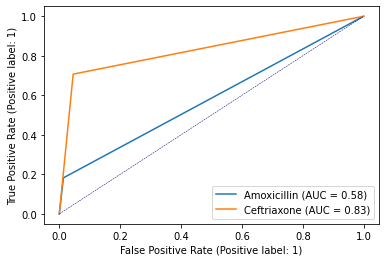

In [174]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = ['Amoxicillin', 'Ceftriaxone']
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

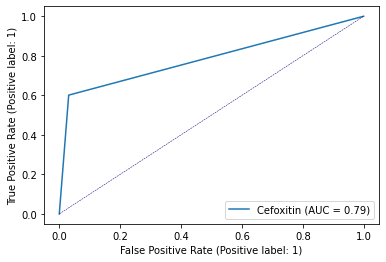

In [61]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[11]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

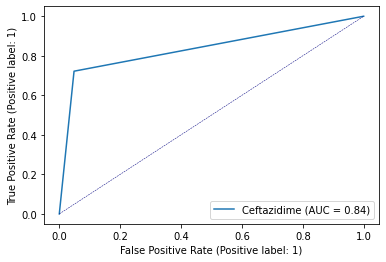

In [62]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[12]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

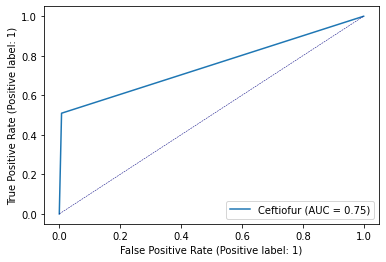

In [63]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[13]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

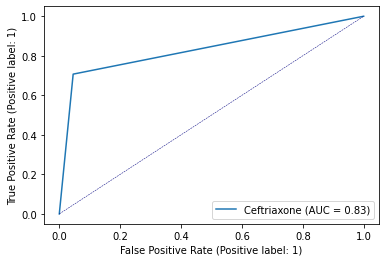

In [64]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[14]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

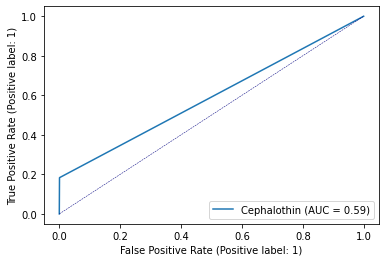

In [65]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[15]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

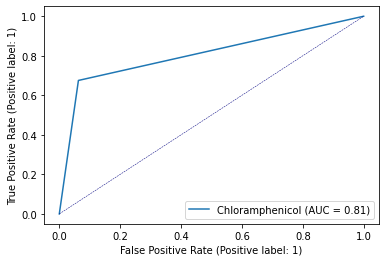

In [66]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[16]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

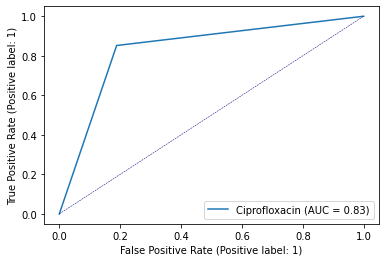

In [67]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[17]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

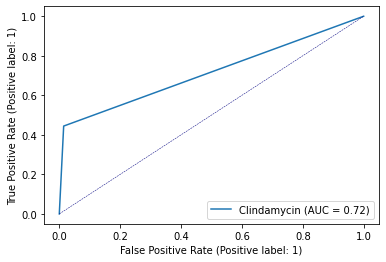

In [136]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[18]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

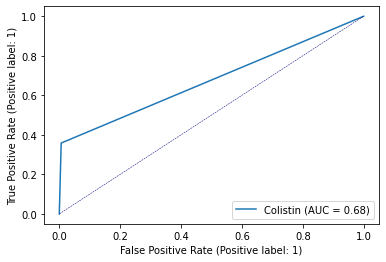

In [137]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[19]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

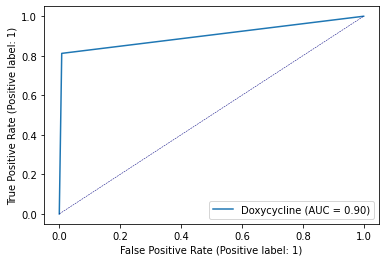

In [138]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[20]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

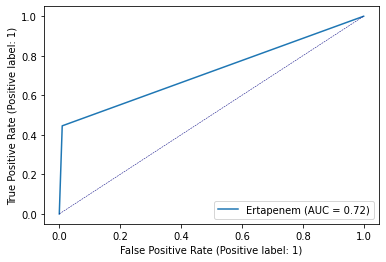

In [139]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[21]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

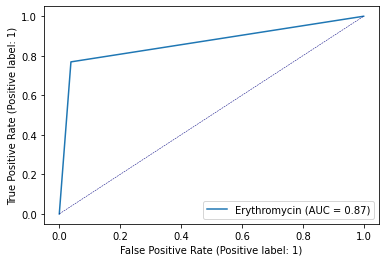

In [140]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[22]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

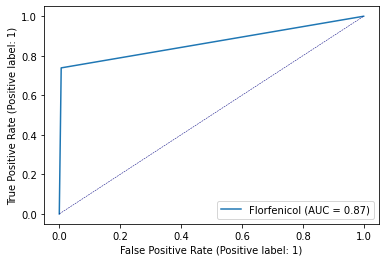

In [141]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[23]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

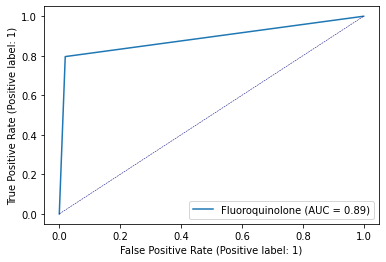

In [142]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[24]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

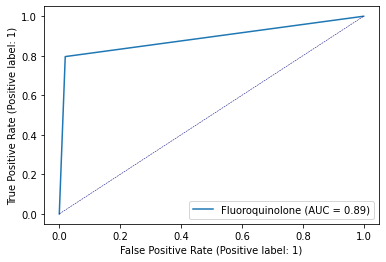

In [143]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[24]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

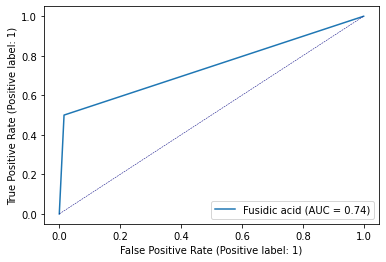

In [144]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[25]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

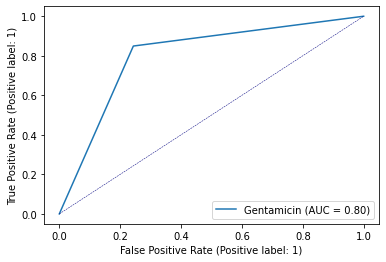

In [145]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[26]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

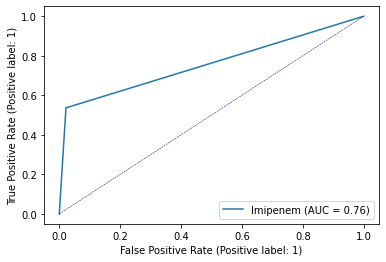

In [146]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[27]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

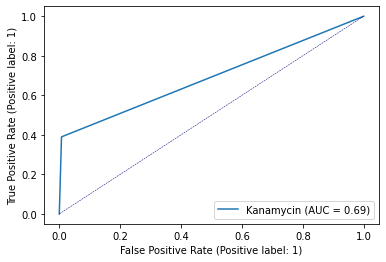

In [147]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[28]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

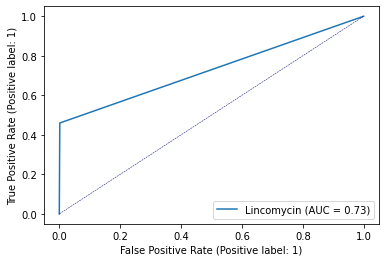

In [148]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[29]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

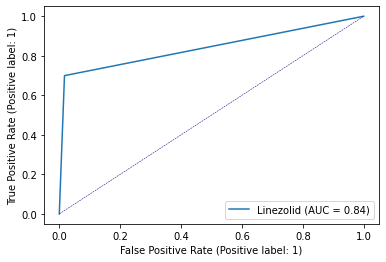

In [149]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[30]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

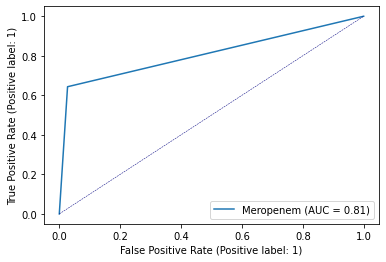

In [150]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[31]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

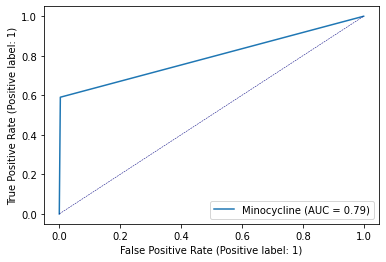

In [151]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[32]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

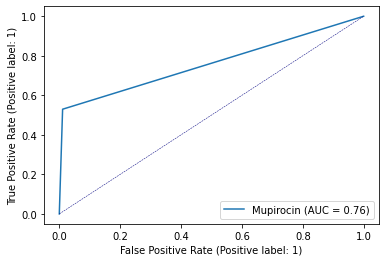

In [152]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[33]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

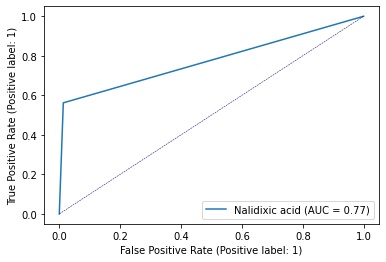

In [153]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[34]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

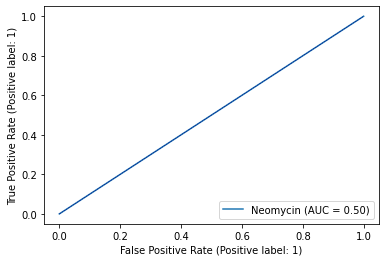

In [154]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[35]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

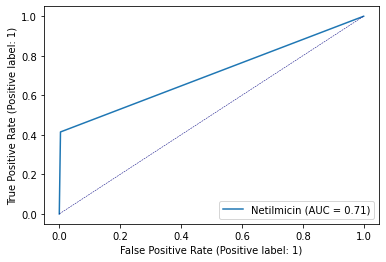

In [155]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[36]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

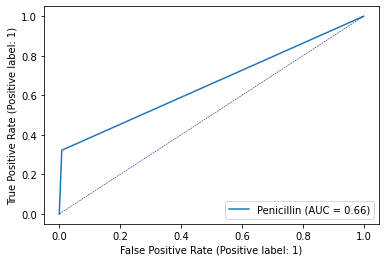

In [156]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[37]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

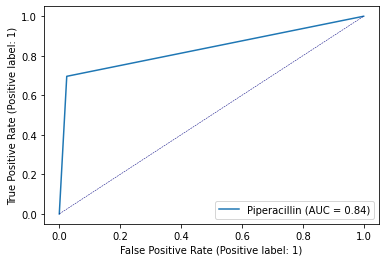

In [157]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[38]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

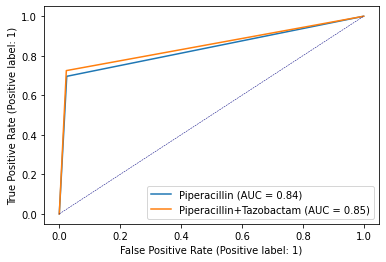

In [158]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[39]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

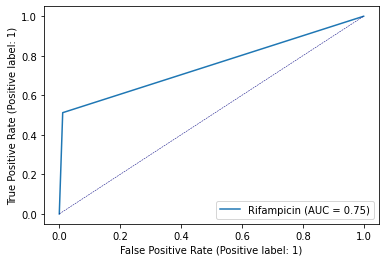

In [159]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[40]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

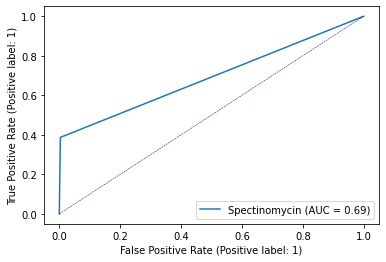

In [160]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[41]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

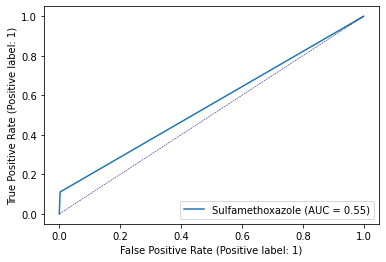

In [161]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[42]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

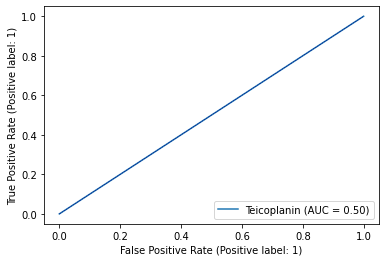

In [162]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[43]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

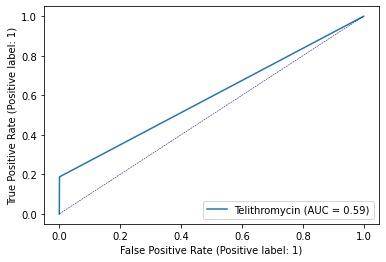

In [163]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[44]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

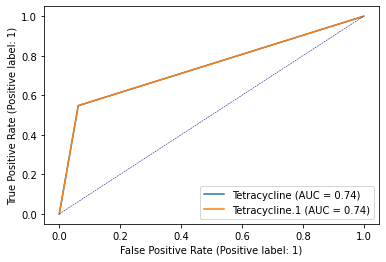

In [164]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[45]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

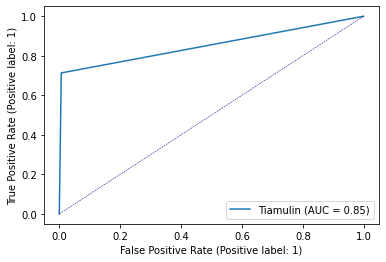

In [165]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[46]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

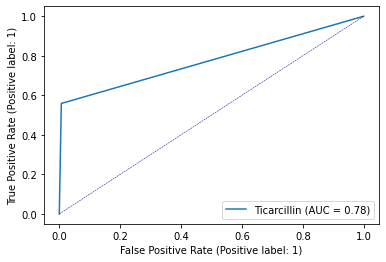

In [166]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[47]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

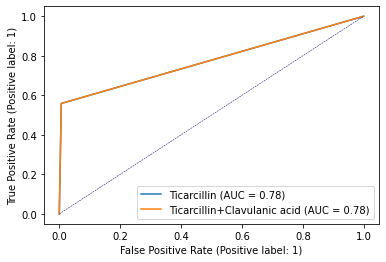

In [167]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[48]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

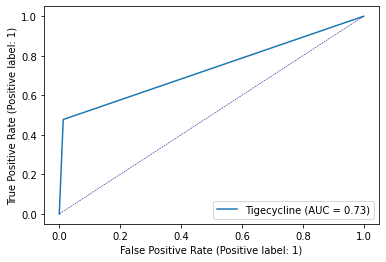

In [168]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[49]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

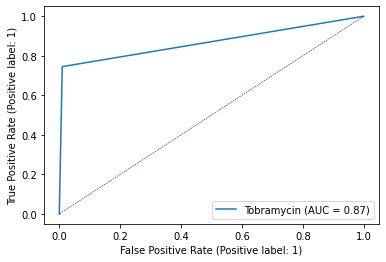

In [169]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[50]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

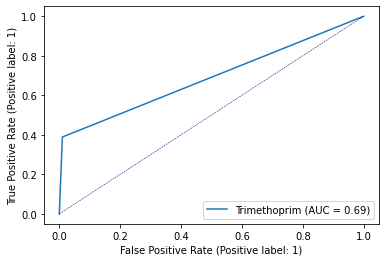

In [170]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[51]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()

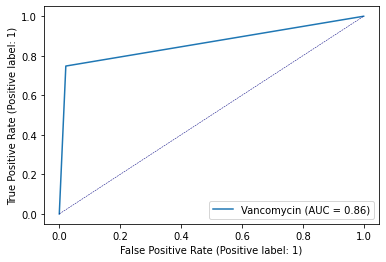

In [171]:
from matplotlib import pyplot as plt
plt.figure()
ax = plt.axes()

temp = cols[52]
for i in range(y_test.shape[1]):
    if cols[i] in temp:
        roc = metrics.RocCurveDisplay.from_predictions(y_test[:,i], y_hat[:,i], ax = ax, name=cols[i])
plt.plot([0, 1], [0, 1], color="navy", lw=0.5, linestyle="--")
plt.show()